In [1]:
import numpy as np
from scipy.linalg import *
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame,Series
import math
import time
import matplotlib.pylab as pltt
import scipy.sparse as sps

In [2]:
Re = 400
rho = 1
L = 1
V = 1
mu = rho*V*L/Re
w = 1

In [3]:
meshx = 4
deltax = L/meshx

meshy = meshx
deltay = L/meshy

mesht = 2 #para o primeiro tempo as velocidades e a pressão são zero
deltat = 1e50

In [4]:
''' coloquei dps
P = np.zeros(((mesht,meshx,meshy)))
u = np.zeros(((mesht,meshx,meshy)))
v = np.zeros(((mesht,meshx,meshy)))
'''

' coloquei dps\nP = np.zeros(((mesht,meshx,meshy)))\nu = np.zeros(((mesht,meshx,meshy)))\nv = np.zeros(((mesht,meshx,meshy)))\n'

In [5]:
# Massa do Volume de Controle
Mp=rho*deltax*deltay*w
# Termos Difusivos
De_u=mu*deltay*w/deltax
De_v=mu*deltay*w/deltax
Dw_u=mu*deltay*w/deltax
Dw_v=mu*deltay*w/deltax
Dn_u=mu*deltax*w/deltay
Dn_v=mu*deltax*w/deltay
Ds_u=mu*deltax*w/deltay
Ds_v=mu*deltax*w/deltay


In [6]:
#posição em relação a manlha da pressão
x_plot = np.zeros(meshx)
y_plot = np.zeros(meshy)
t_plot = np.zeros(mesht)

x_plot = np.linspace(-deltax/2,L-deltax/2,meshx)
y_plot = np.linspace(-deltay/2,L-deltay/2,meshy)

In [25]:
#CDS
P = np.zeros(((mesht,meshy,meshx)))
u = np.zeros(((mesht,meshy,meshx)))
v = np.zeros(((mesht,meshy,meshx)))

Me_u = np.zeros((meshy,meshx))
Mw_u = np.zeros((meshy,meshx))
Mn_u = np.zeros((meshy,meshx))
Ms_u = np.zeros((meshy,meshx))

Me_v = np.zeros((meshy,meshx))
Mw_v = np.zeros((meshy,meshx))
Mn_v = np.zeros((meshy,meshx))
Ms_v = np.zeros((meshy,meshx))

ae_u = np.zeros((meshy,meshx))
aw_u = np.zeros((meshy,meshx))
an_u = np.zeros((meshy,meshx))
as_u = np.zeros((meshy,meshx))
ap0_u = np.zeros((meshy,meshx))
b_u = np.zeros((meshy,meshx))
ap_u = np.zeros((meshy,meshx))
ae_v = np.zeros((meshy,meshx))
aw_v = np.zeros((meshy,meshx))
an_v = np.zeros((meshy,meshx))
as_v = np.zeros((meshy,meshx))
ap0_v = np.zeros((meshy,meshx))
b_v = np.zeros((meshy,meshx))
ap_v = np.zeros((meshy,meshx))

u_antigo = np.zeros((meshy,meshx))
v_antigo = np.zeros((meshy,meshx))
P_antigo = np.zeros((meshy,meshx))

eps = 1e-4
erro = 1
for t in range(1,mesht):
    iteracoes = 0
    while (erro > eps): 
        u_antigo[:,:] = u[t,:,:]
        v_antigo[:,:] = v[t,:,:]
        P_antigo[:,:] = P[t,:,:]
        
        for y in range(1,meshx):
            for y in range(1,meshy-1):
                Me_u[y,x] = rho*(u[t,y,x]+u[t,y+1,x])/2*deltax*w
                Mw_u[y,x] = rho*(u[t,y,x]+u[t,y-1,x])/2*deltax*w
                Mn_u[y,x] = rho*(v[t,y,x]+v[t,y+1,x])/2*deltay*w
                Ms_u[y,x] = rho*(v[t,y,x-1]+v[t,y+1,x-1])/2*deltay*w
                
        for y in range(1,meshx-1):
            for x in range(1,meshy): 
                Me_v[y,x] = rho*(u[t,y,x]+u[t,y,x+1])/2*deltax*w
                Mw_v[y,x] = rho*(u[t,y-1,x+1]+u[t,y-1,x])/2*deltax*w
                Mn_v[y,x] = rho*(v[t,y,x]+v[t,y,x+1])/2*deltay*w
                Ms_v[y,x] = rho*(v[t,y,x]+v[t,y,x-1])/2*deltay*w
        
        for y in range(1,meshx-1):
            for x in range(1,meshy-1):     
                ae_u[y,x] = De_u - Me_u[y,x]/2
                aw_u[y,x] = Dw_u + Mw_u[y,x]/2
                an_u[y,x] = Dn_u - Mn_u[y,x]/2
                as_u[y,x] = Ds_u + Ms_u[y,x]/2
                ap0_u[y,x] = Mp/deltat
                b_u[y,x] =ap0_u[y,x]*u[t-1,y,x]
                ap_u[y,x] = ae_u[y,x] + aw_u[y,x] + an_u[y,x] + as_u[y,x] + ap0_u[y,x]
                
                ae_v[y,x] = De_v - Me_v[y,x]/2
                aw_v[y,x] = Dw_v + Mw_v[y,x]/2
                an_v[y,x] = Dn_v - Mn_v[y,x]/2
                as_v[y,x] = Ds_v + Ms_v[y,x]/2
                ap0_v[y,x] = Mp/deltat
                b_v[y,x] =ap0_v[y,x]*v[t-1,y,x]
                ap_v[y,x] = ae_v[y,x] + aw_v[y,x] + an_v[y,x] + as_v[y,x] + ap0_v[y,x]
        ##Condições de contorno para C.Q.M em y:
        #face esquerda        
        for x in range(meshx):
            ap_u[0,x] = 1
            b_u[0,x] = 0
            
        #face direita
        for x in range(meshx):
            ap_u[meshy-1,x] = 1
            b_u[meshy-1,x] = 0
            
        #face norte
        for y in range(1,meshy-1):
            ae_u[y,meshx-1] = De_u - Me_u[y,meshx-1]/2
            aw_u[y,meshx-1] = Dw_u + Mw_u[y,meshx-1]/2
            an_u[y,meshx-1] = 0
            as_u[y,meshx-1] = Ds_u +Ms_u[y,meshx-1]/2
            ap0_u[y,meshx-1] = Mp/deltat
            b_u[y,meshx-1] = ap0_u[y,meshx-1]*u[t-1,y,meshx-1] + 2*Dn_u*V
            ap_u[y,meshx-1] = ae_u[y,meshx-1] + aw_u[y,meshx-1] + as_u[y,meshx-1] + ap0_u[y,meshx-1] +2*Dn_u
            
        #face sul ficticia -> não importa os valores de u
        for y in range(meshy):
            ap_u[y,0] = 1
            b_u[y,0] = 0
            
        #face sul real
        for y in range(1,meshy-1):
            ae_u[y,1] = De_u - Me_u[y,1]/2
            aw_u[y,1] = Dw_u + Mw_u[y,1]/2
            an_u[y,1] = Dn_u - Mn_u[y,1]/2
            as_u[y,1] = 0
            ap0_u[y,1] = Mp/deltat
            b_u[y,1] = ap0_u[y,1]*u[t-1,y,1]
            ap_u[y,1] = ae_u[y,1] + aw_u[y,1] + an_u[y,1] + as_u[y,1] + ap0_u[y,1] +2*Ds_u
        ##Fim CC para C.Q.M. em y
        
        ##Condições de contorno para C.Q.M em x:
        #face norte
        for y in range(meshy):
            ap_v[y,meshx-1] = 1
            b_v[y,meshx-1] = 0
           
        #face sul
        for y in range(meshy):
            ap_v[y,0] = 1
            b_v[y,0] = 0
            
        #face esquerda ficticia -> não importa valores de v nesses pontos
        for x in range(meshx):
            ap_v[0,x] = 1
            b_v[0,x] = 0
            
        #face esquerda real
        for x in range(1,meshx-1):
            ae_v[1,x] = De_v - Me_v[1,x]/2 
            aw_v[1,x] = 0
            an_v[1,x] = Dn_v - Mn_v[1,x]/2
            as_v[1,x] = Ds_v + Ms_v[1,x]/2
            ap0_v[1,x] = Mp/deltat
            b_v[1,x] = ap0_v[1,x]*v[t-1,1,x]
            ap_v[1,x] = ae_v[1,x] + aw_v[1,x] + an_v[1,x] + as_v[1,x] + ap0_v[1,x] + 2*Dw_v
            
        #face direita
        for x in range(1,meshx-1):
            ae_v[meshy-1,x] = 0
            aw_v[meshy-1,x] = Dw_v + Mw_v[meshy-1,x]/2
            an_v[meshy-1,x] = Dn_v - Mn_v[meshy-1,x]/2
            as_v[meshy-1,x] = Ds_v + Ms_v[meshy-1,x]/2
            ap0_v[meshy-1,x] = Mp/deltat
            b_v[meshy-1,x] = ap0_v[1,x]*v[t-1,meshy-1,x]
            ap_v[meshy-1,x] = aw_v[meshy-1,x] + an_v[meshy-1,x] + as_v[meshy-1,x] + ap0_v[meshy-1,x] + 2*De_v
        ##Fim CC para C.Q.M. em x
        
        #Montando a matriz de coef
        Matriy_coef_A = np.zeros((3*meshy*meshx,3*meshy*meshx))
        Matriy_coef_B = np.zeros((3*meshy*meshx,1))
        cont = 0
        
        #1º quadrante
        for y in range(meshx):
            for x in range(meshy):
                Matriy_coef_A[cont,cont] = ap_u[y,x]
                if (cont < meshy*meshx-1):
                    Matriy_coef_A[cont,cont+1] = -ae_u[y,x]
                if (cont > 0):
                    Matriy_coef_A[cont,cont-1] = -aw_u[y,x]
                if (cont < meshy*meshx - meshy):
                    Matriy_coef_A[cont,cont+meshy] = -an_u[y,x]
                if (cont > meshy-1):
                    Matriy_coef_A[cont,cont-meshy] = -as_u[y,x]
                Matriy_coef_B[cont,0] = b_u[y,x]
                #3º quadrante
                if (y != 0) and (x != 0) and (y != meshy-1):
                    Matriy_coef_A[cont, cont + 2*meshy*meshx] = -w*deltax
                    if (cont < meshy*meshx-1):
                        Matriy_coef_A[cont, cont + 2*meshy*meshx+1] = w*deltax
                cont += 1
                
        #5º quadrante
        cont = meshy*meshx
        for y in range(meshx):
            for x in range(meshy):
                Matriy_coef_A[cont,cont] = ap_v[y,x]
                if (cont < 2*meshy*meshx-1):
                    Matriy_coef_A[cont,cont+1] = -ae_v[y,x]
                if (cont >meshy*meshx):
                    Matriy_coef_A[cont,cont-1] = -aw_v[y,x]
                if (cont < 2*meshy*meshx - meshy):
                    Matriy_coef_A[cont,cont+meshy] = -an_v[y,x]
                if (cont > meshy*meshx + meshy-1):
                    Matriy_coef_A[cont,cont-meshy] = as_v[y,x]
                Matriy_coef_B[cont,0] = b_v[y,x]
                #6º quadrante
                if (y != 0) and (x != 0) and (x != meshx-1):
                    Matriy_coef_A[cont, cont + meshy*meshx] = w*deltay
                    if (cont < 2*meshy*meshx-meshy):
                        Matriy_coef_A[cont, cont + meshy*meshx+meshy] = -w*deltay
                cont += 1
                
        #7º quadrante
        cont = 2*meshy*meshx
        i = 0
        for y in range(meshx):
            for x in range(meshy):
                if (y != 0) and (x != 0):
                    Matriy_coef_A[cont,i] = deltax*w
                    Matriy_coef_A[cont,i-1] = -deltay*w

                    #8º quadrante
                    Matriy_coef_A[cont,i+meshy*meshx] = deltay*w
                    Matriy_coef_A[cont,i+meshy*meshx-meshy] = -deltay*w
                cont += 1
                i += 1
            
        cont = 2*meshy*meshx
        #9º quadrante
        for x in range(meshx):
            for y in range(meshy):
                #para os volumes ficticios, pressão = 0
                if (y==0) or (x == 0):
                    Matriy_coef_A[cont,cont] = 1
                cont += 1
        #determinando pressão de referência = 0 no último volume
        Matriy_coef_A[meshy*meshx*3-1,:] = 0 #rever dps
        Matriy_coef_A[meshy*meshx*3-1,meshy*meshx*3-1] = 1
        
        Resultado = solve(Matriy_coef_A,Matriy_coef_B)
        cont = 0
        for y in range(meshx):
            for x in range(meshy):
                u[t,y,x] = Resultado[cont,0]
                cont += 1
        #cont = meshy*meshx        
        for y in range(meshx):
            for x in range(meshy):
                v[t,y,x] = Resultado[cont,0]
                cont += 1
        #cont = meshy*meshx*2        
        for y in range(meshx):
            for x in range(meshy):
                P[t,y,x] = Resultado[cont,0]
                cont += 1
        erro_u = (u[t,:,:] - u_antigo[:,:])
        erro_v = (v[t,:,:] - v_antigo[:,:])
        erro_P = (P[t,:,:] - P_antigo[:,:])
        erro = max(abs(erro_u.max()),abs(erro_v.max()),abs(erro_P.max()))
        iteracoes += 1
        print(iteracoes)
        if (iteracoes == 500):
            erro = 0 #mudar dps
                


IndexError: index 4 is out of bounds for axis 2 with size 4

In [26]:
Me_u

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [27]:
erro_v

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        , -0.81087279, -0.17101815,  0.        ],
       [ 0.        ,  0.91515266,  0.10947858,  0.        ],
       [ 0.        , -0.10427988,  0.06153957,  0.        ]])

In [28]:
erro_P

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.00521632, -0.02509327, -0.01292832],
       [ 0.        , -0.03689906, -0.00226182, -0.01400381],
       [ 0.        ,  0.02380726,  0.0145003 ,  0.        ]])

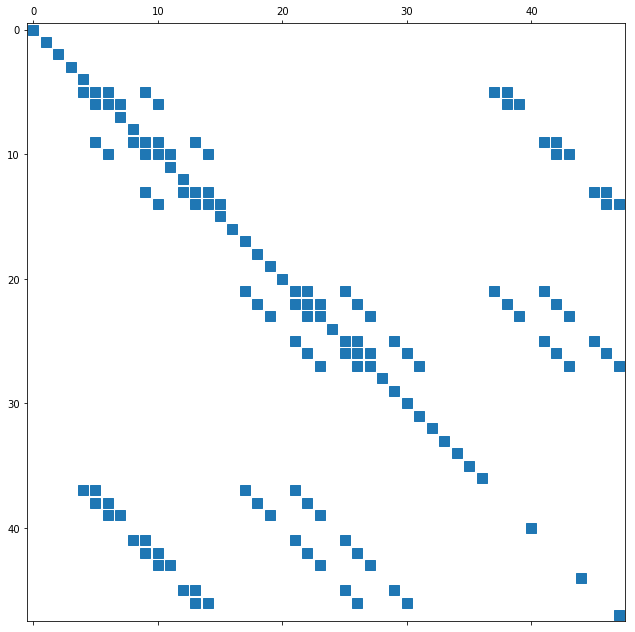

In [31]:
%matplotlib inline
M = sps.csr_matrix(Matriy_coef_A)
fig, ax = pltt.subplots(figsize=(11,11))
ax.spy(M)


C:\Users\Gusttav\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\Gusttav\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


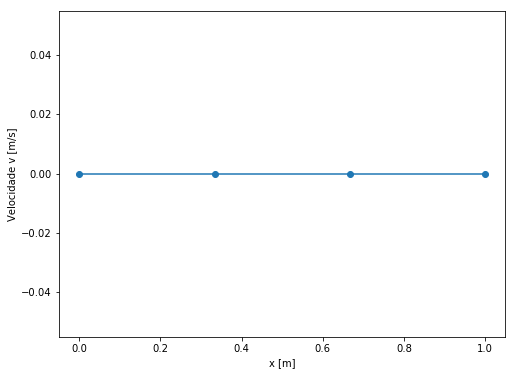

In [30]:
%matplotlib inline
fig = plt.figure(figsize=(8,6))
axis = fig.add_subplot(111)   

axis.plot(x_plot+deltax/2,v[1,:,(meshx-1)/2],marker='o')

axis.set_ylabel('Velocidade v [m/s]')
axis.set_xlabel('x [m]')
axis.set_title('')
axis.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#axis.set_ylim(30,100)
#axis.set_xlim(-0.05,0.45)


In [23]:
an_u

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.0172883 , -0.00074825,  0.        ],
       [ 0.        ,  0.03153228,  0.00800147,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [24]:
ae_v

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.00800147, -0.02653228,  0.        ],
       [ 0.        ,  0.00574825,  0.0172883 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])